In [19]:
import torch
from matplotlib import pylab as plt
from odenet import datasets
from odenet.odenet_cifar10 import ODEResNet
from odenet import refine_train

import importlib
importlib.reload(refine_train)
from odenet.helper import set_seed, get_device, which_device
#importlib.reload(odenet_cifar10)

In [2]:
set_seed()
device = get_device()

Connected to a GPU


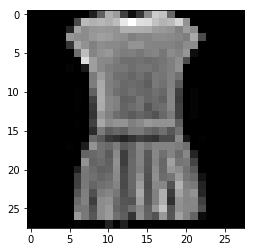

In [9]:
refset,trainset,trainloader,testset,testloader \
    = datasets.get_dataset('FMNIST',root='../data/')
plt.imshow(refset.data[3],cmap='gray')

In [23]:
def do_a_train_set(ALPHA,method, N_epochs, N_adapt, lr):
    model = ODEResNet(ALPHA=ALPHA,method=method,in_channels=1).to(device)
    res = refine_train.train_adapt(model, trainloader, torch.nn.CrossEntropyLoss(),
                N_epochs, N_adapt, lr=lr, device=device)
    plt.semilogy(res[1])
    for r in res[2]:
        plt.axvline(r,color='k')
    return res

In [ ]:
stash = {}

In [ ]:
for method in ['euler']:#,'midpoint','rk4']:
    res = do_a_train_set(4,method,5,3, 1.0e-4)
    stash[method] = res

Starting with  6478 with lr =  0.0001


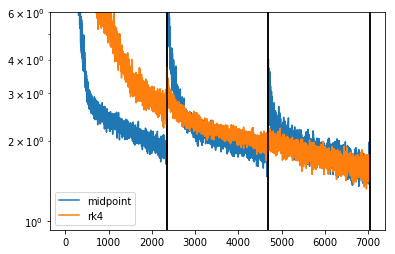

In [32]:
for k,(models,losses,refine_steps) in stash.items():
    plt.semilogy(losses,label=k)
    for r in refine_steps:
        plt.axvline(r,color='k')
plt.ylim(top=6)
plt.legend()
plt.show()

In [ ]:
for k,(models,losses,refine_steps) in stash.items():
    print(k)
    refine_train.plot_accuracy(models[-1],testloader)